# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To calculate correlation
from scipy.stats import pearsonr

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# For tuning the model
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
path='/content/drive/MyDrive/Boston.csv'

In [4]:

df=pd.read_csv(path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

- The MEDV: Median value of owner-occupied homes in 1000 dollars is the dependant variable(target variable) in the dataset and all the other variables are the independant variables on which we will determine the prices for the houses.

In [5]:
#We copy the data to another variable to avoid any changes to original data.
data_copy=df.copy()

In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [7]:
#We check the number of rows and columns available.
df.shape

(506, 13)

There are 506 rows and 13 columns present in this dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


 **Observations:**
* There are no missing values in this data set.
* There are no object columns in this data set with the rest being numerical columns and CHAS,RAD,TAX are the integer ones and the rest are Float.

In [9]:
# We check for missing values in the data.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**Observation:**
- There are no missing values in the data.

In [10]:
# We check for duplicate values in the data.
df.duplicated().sum()

0

**Observation:**
- There are no duplicate rows in the data.

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
- We see that the MEDV: Median value of the homes ranges from values as low as 5 to the biggest value 50.
- It is seen that there are towns with crime rate less than 1 with the maximum being a whopping 89.
- Almost 50% of the land hasnt been allocated.

In [12]:
df.MEDV.value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

**Observation:**
- There are more owner occupied houses with the highest median values.
    

In [13]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

**Observation:**
- We see that there are more areas with more accessibility to the highways with 24 being the highest index value and the area with index 7 has the least accessibility.
    
    

<Axes: >

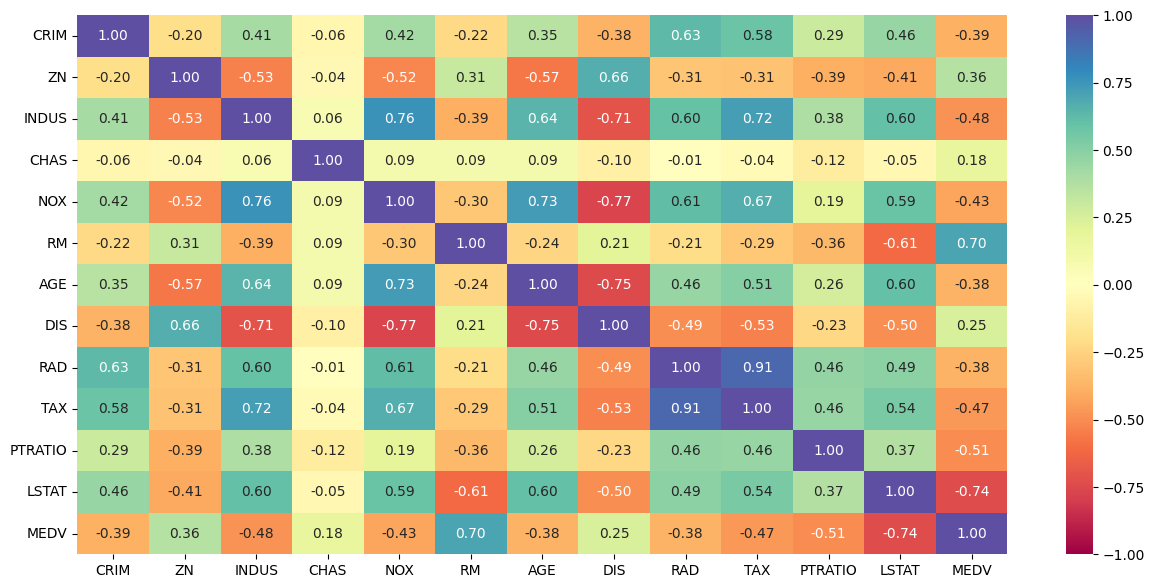

In [14]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:**
- RM is positively correlated with our target variable MEDV and It makes sense as the median price increases according to the number of rooms in each unit.
- LSTAT is negatively correlated with MEDV which would mean that the higher the percentage of the lower status population, the median house values are less and vice versa.
- INDUS is positively correlated with NOX as well as TAX. This could mean that non retail business areas have higher concentrations of Nitric oxide, could be a cause of concern. Also, TAX seems to be higher for houses around the non residential areas.
- It also seems that a lot of house build before 1940 are centered around places with higher NO2 concentration. Probably near non-retail business areas which have higher NO2 concentration levels.
- DIS is negatively correlated with INDUS,NOX and AGE which could imply that the places far away from employment centres have houses which were built more recently, have lesser non retail businesses nearby which can explain the low NO2 concentration levels.
- RAD is highly correlated with TAX meaning easier accessibility to highways plays a huge impact on Tax.

In [15]:
df.CHAS.value_counts()


0    471
1     35
Name: CHAS, dtype: int64

**Observation:**
- We see that majority of the properties do not lie close to the Charles River.
- It is also a binomial distribution.
    

In [16]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

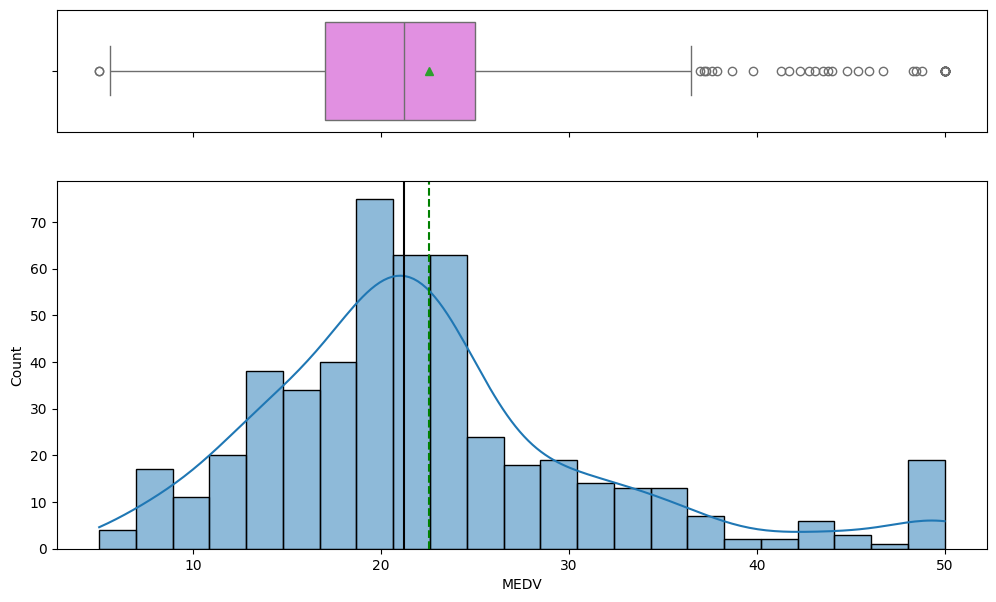

In [17]:
histogram_boxplot(df, "MEDV")

**Observations:**
- This distribution is slightly right skewed indicating that there are more houses which have their median values for the prices on the higher side. The median is lying around 21.
    

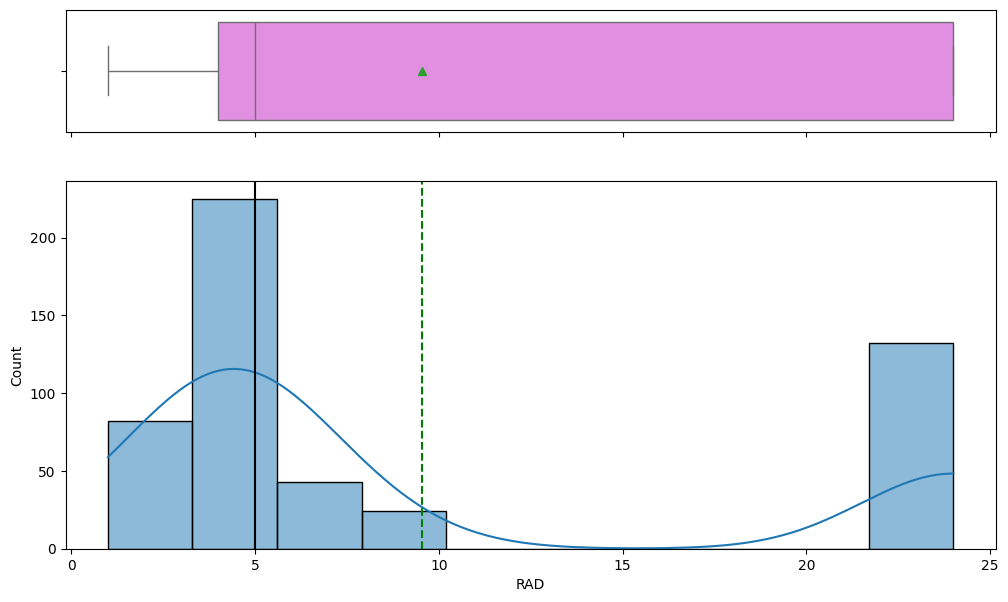

In [18]:
histogram_boxplot(df, "RAD")

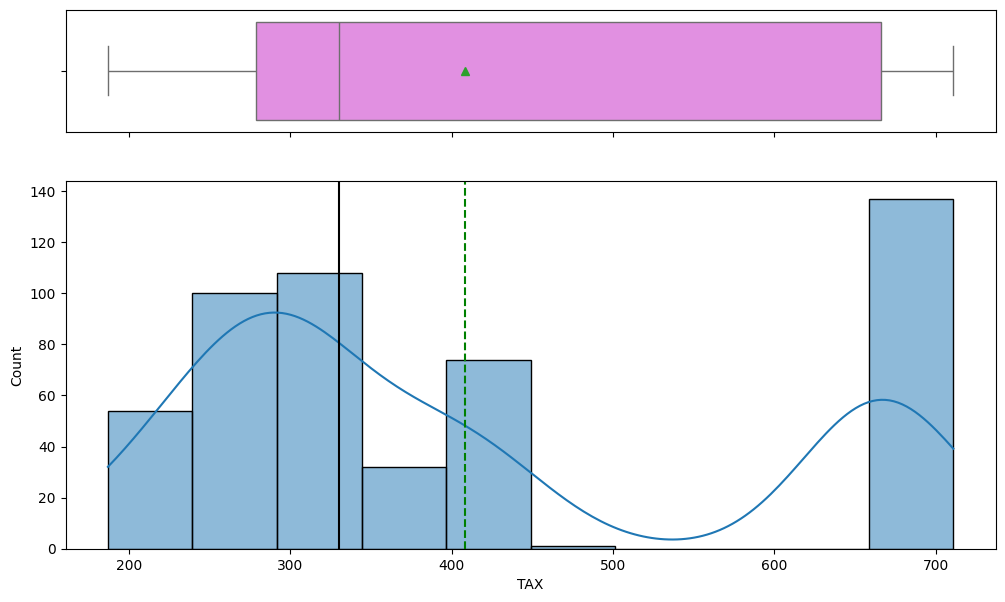

In [19]:
histogram_boxplot(df, "TAX")

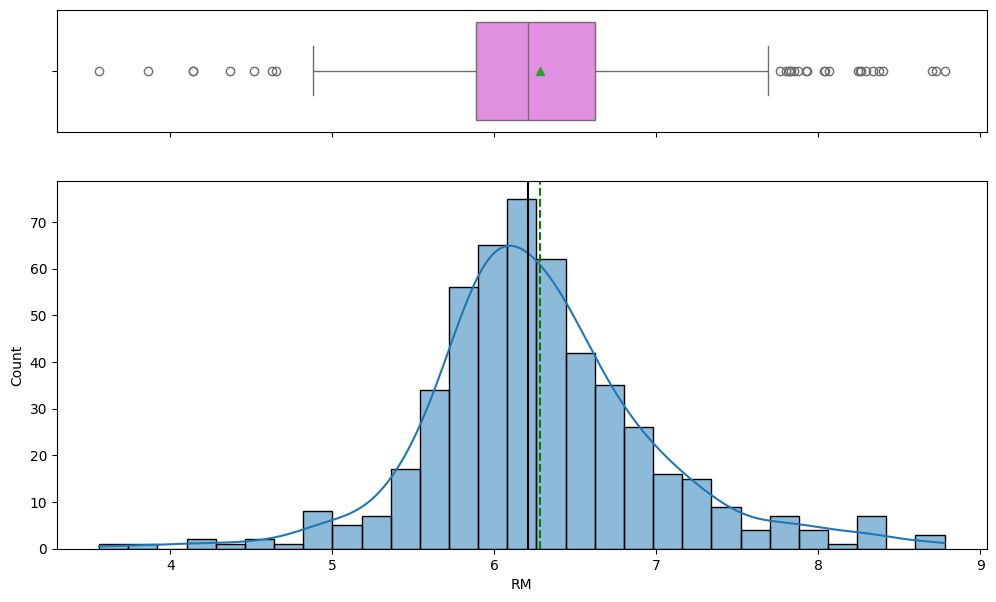

In [20]:
histogram_boxplot(df, "RM")

**Observations:**
- This distribution looks very similar to a normal distribution with the peak being around 6.5.

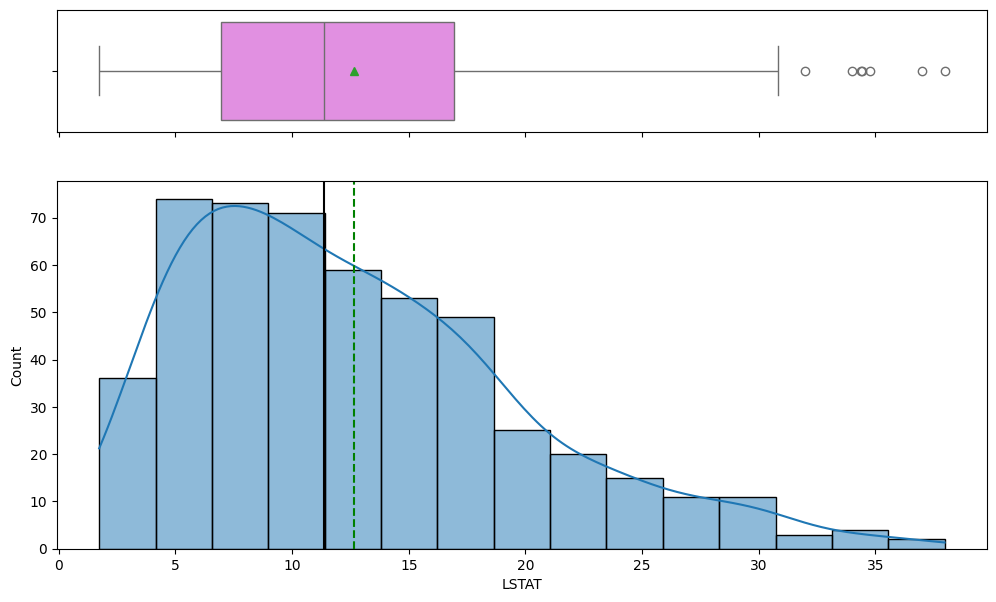

In [21]:
histogram_boxplot(df, "LSTAT")

**Observations:**
- This distribution is slightly right skewed indicating that there are lesser people with lower socioeconomic status in majority of the suburbs.
- It also is almost exponential.    

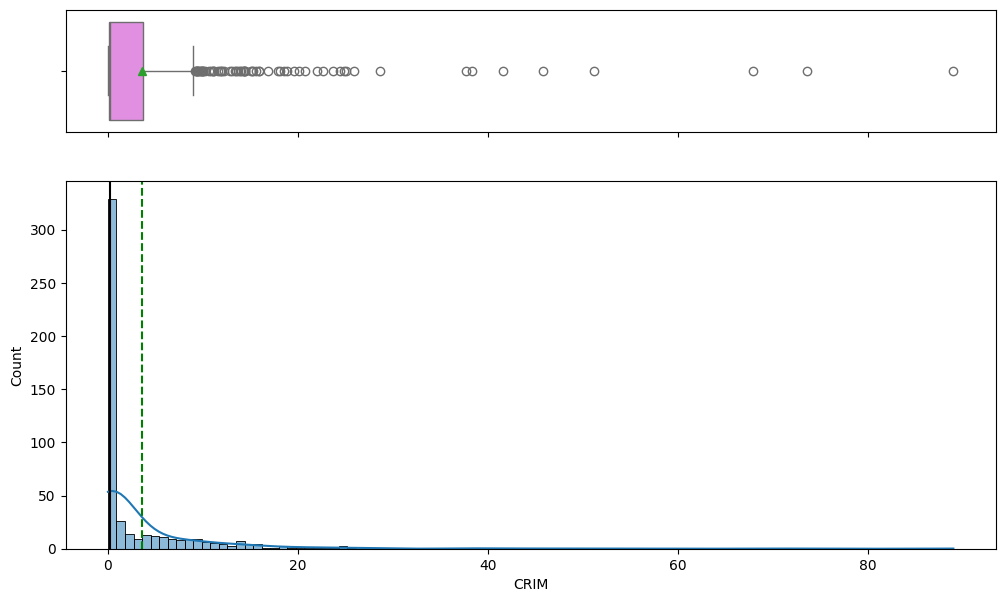

In [22]:
histogram_boxplot(df, "CRIM")

**Observations:**
- This distribution is highly right skewed with some outliers indicating there are areas where the crime rate is extremely high.

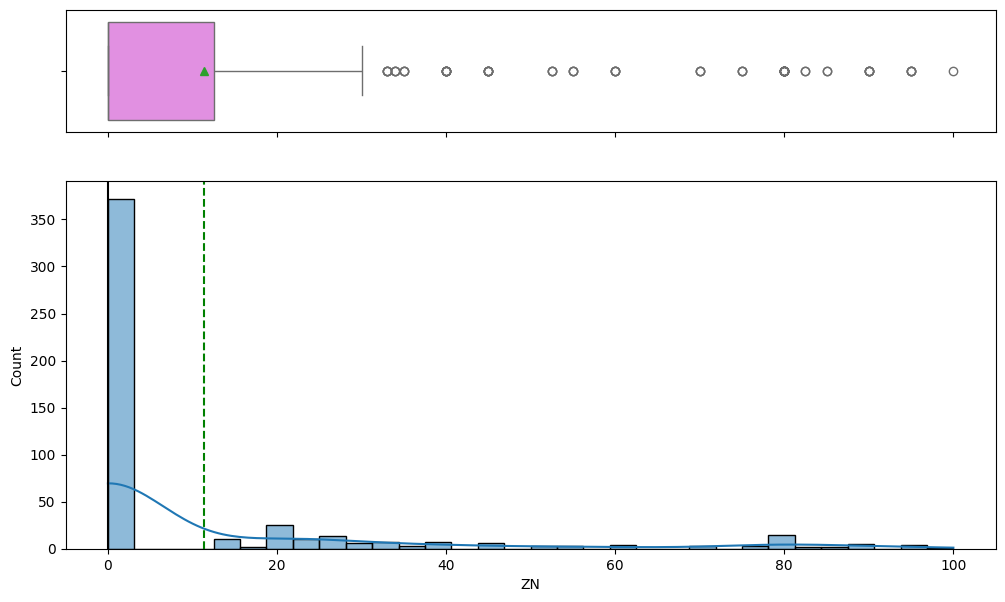

In [23]:
histogram_boxplot(df, "ZN")

**Observations:**
- This distribution is highly right skewed indicating that most of the residential land is not allocated for lands over 25,000 square feet.

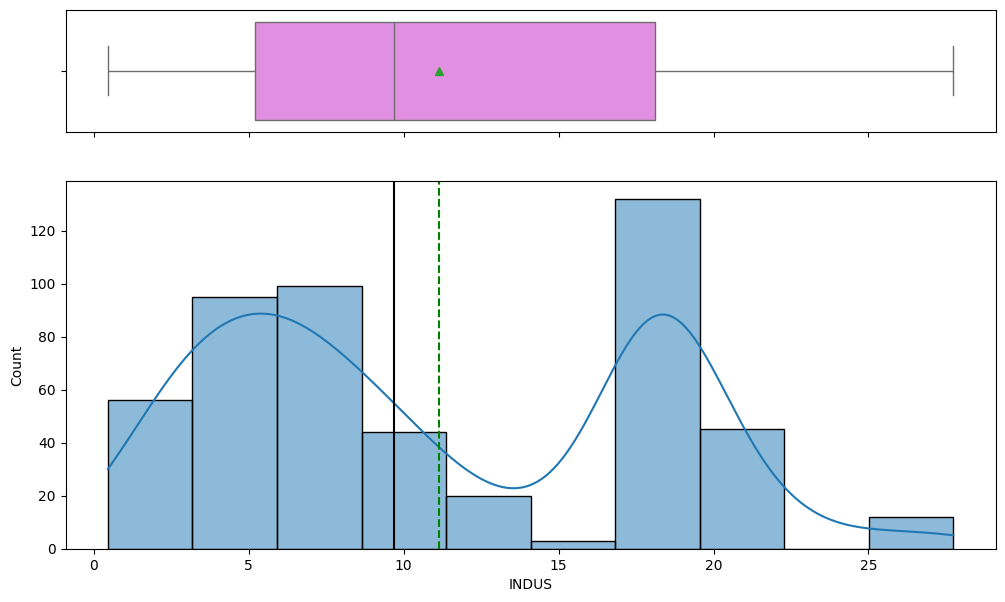

In [24]:
histogram_boxplot(df, "INDUS")

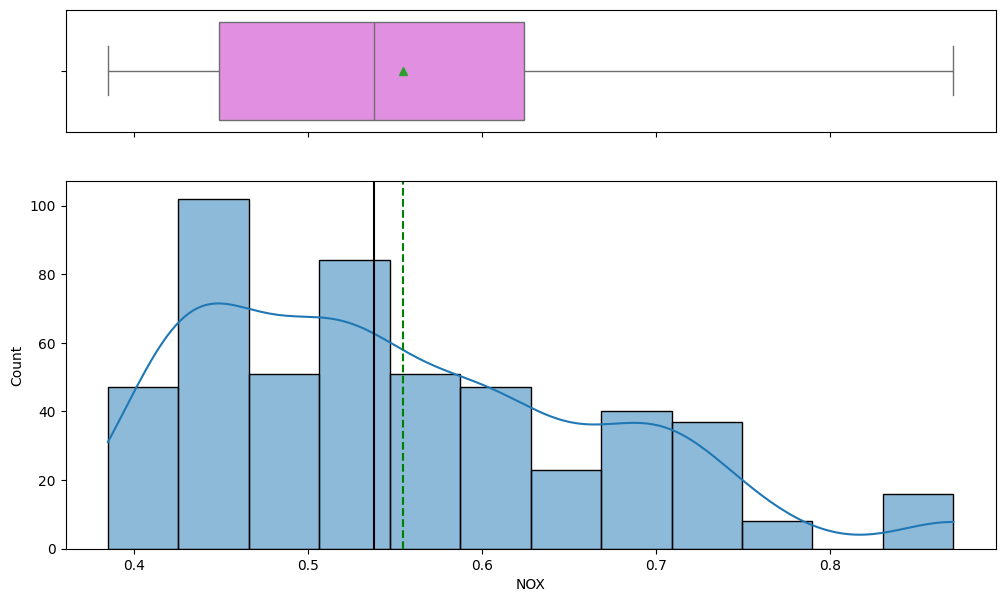

In [25]:
histogram_boxplot(df, "NOX")

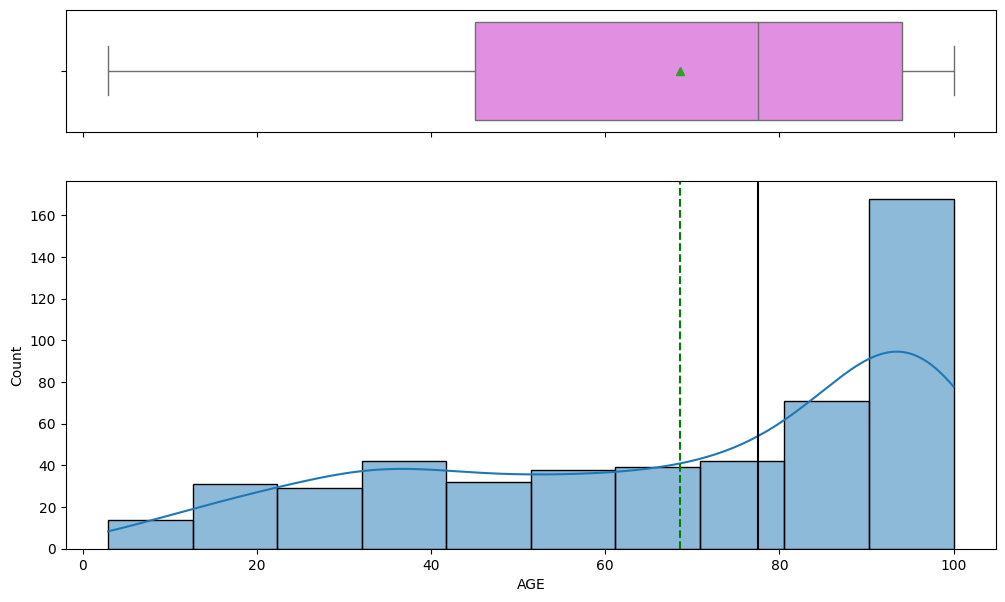

In [26]:
histogram_boxplot(df, "AGE")

**Observations:**
- This distribution is left skewed indicating that most of the units occupied are older properties which were built before 1940.

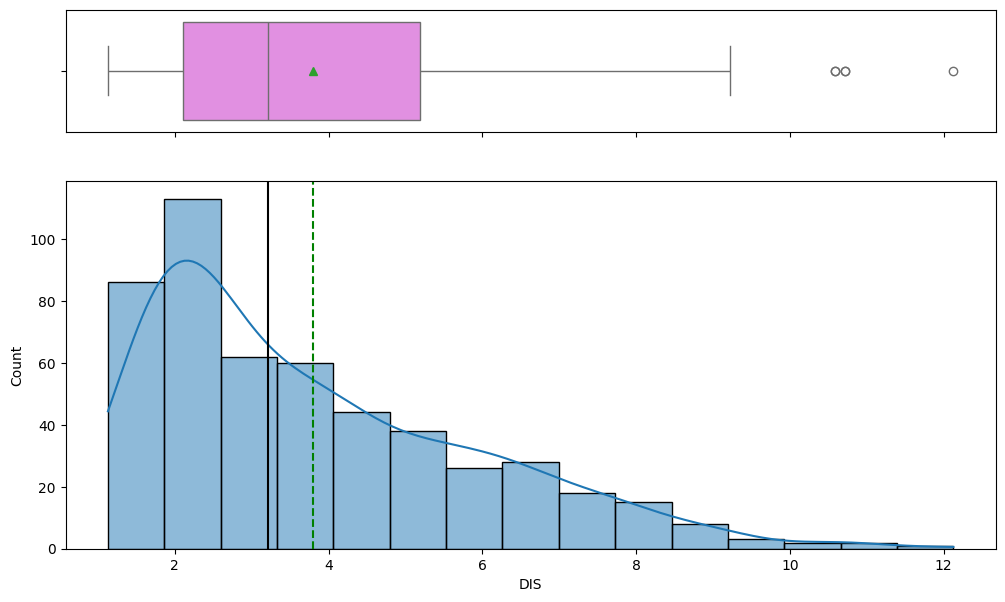

In [27]:
histogram_boxplot(df, "DIS")

**Observations:**
- This distribution seems to  be an exponential distribution. From this, we can observe that the distances are shorter for most of the houses to the employment centres.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [28]:
#We perform log transformation on the dependant variable since it is slightly right skewed.
df['MEDV_log'] = np.log(df.MEDV)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,MEDV_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,3.589059


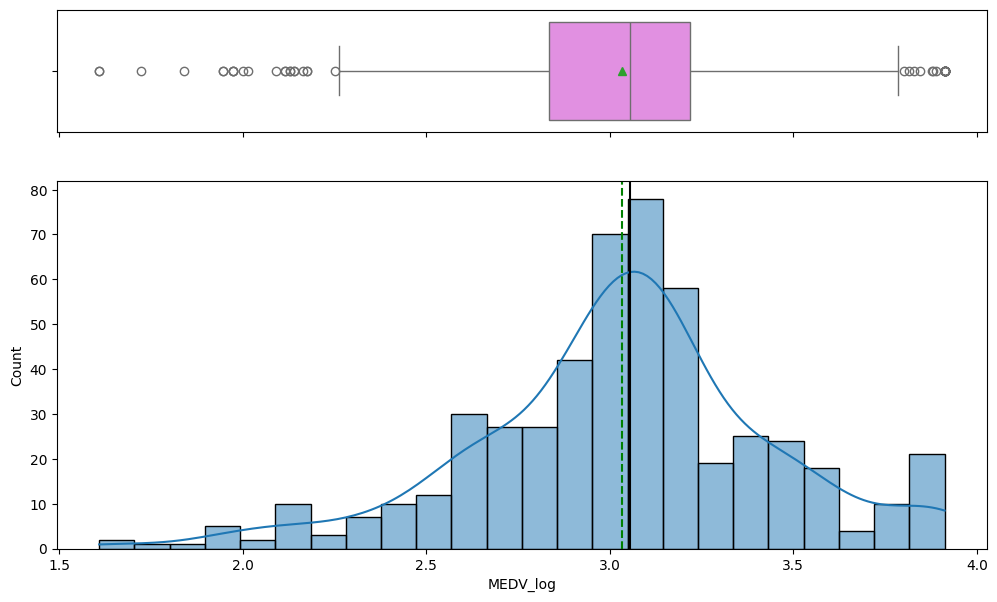

In [29]:
histogram_boxplot(df, "MEDV_log")

**Observations:**
- The distribution for MEDV now after log transformation seems better as it is closer to a normal distribution.

Let us check the distribution of the variables which highly correlate with the target variable MEDV.


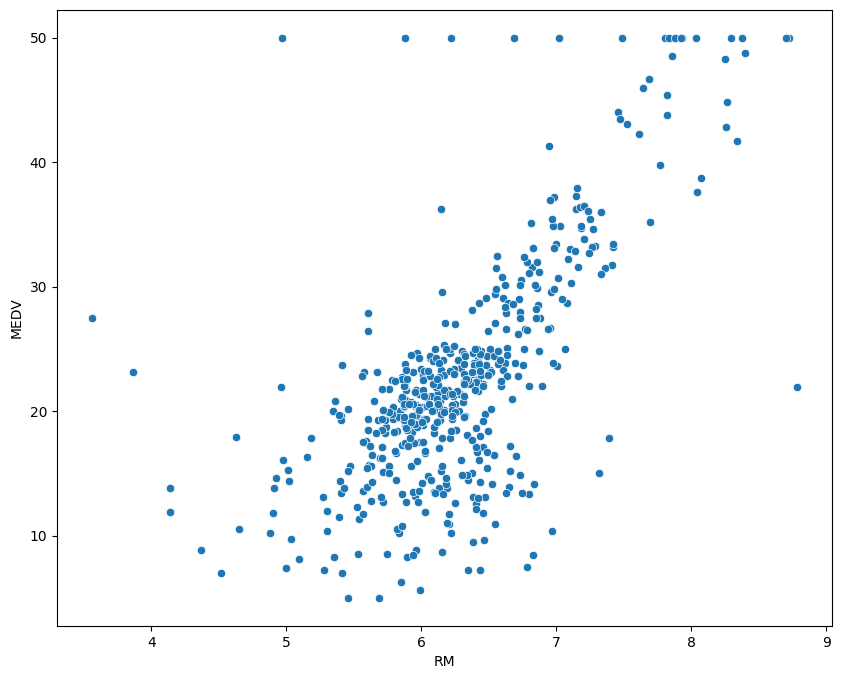

In [30]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.RM , y = df.MEDV)
plt.show()

**Observations:**
- The relationship seems to be linear as we can see that the median value of houses increase accordingly with the number of rooms per dwelling.
- There does seem to be a streak of outliers around 50.

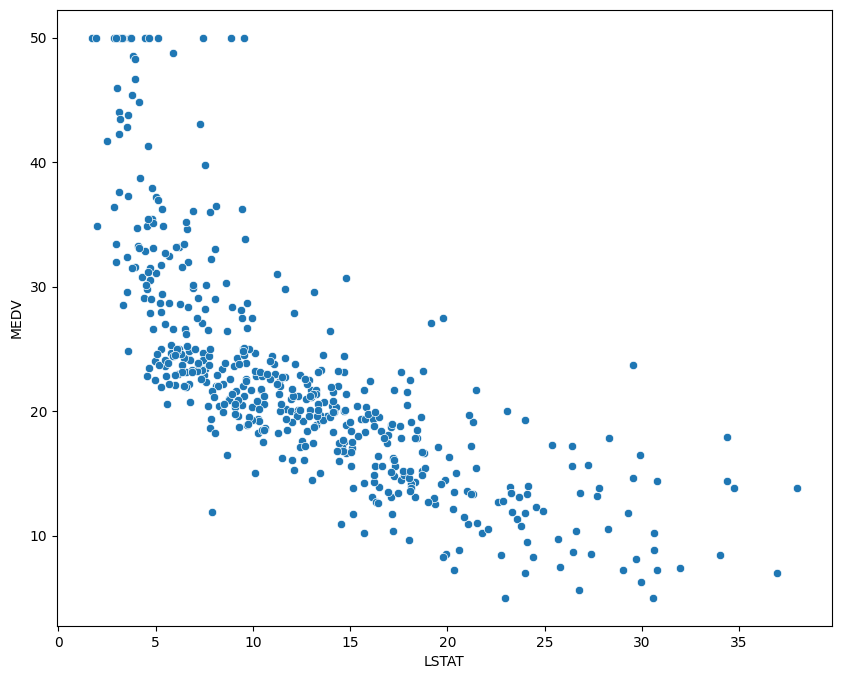

In [31]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.LSTAT, y = df.MEDV)
plt.show()

**Observations:**
- There is decrease in the median value for houses pertaining to the increase in concentration of population with lower socioeconomic status.

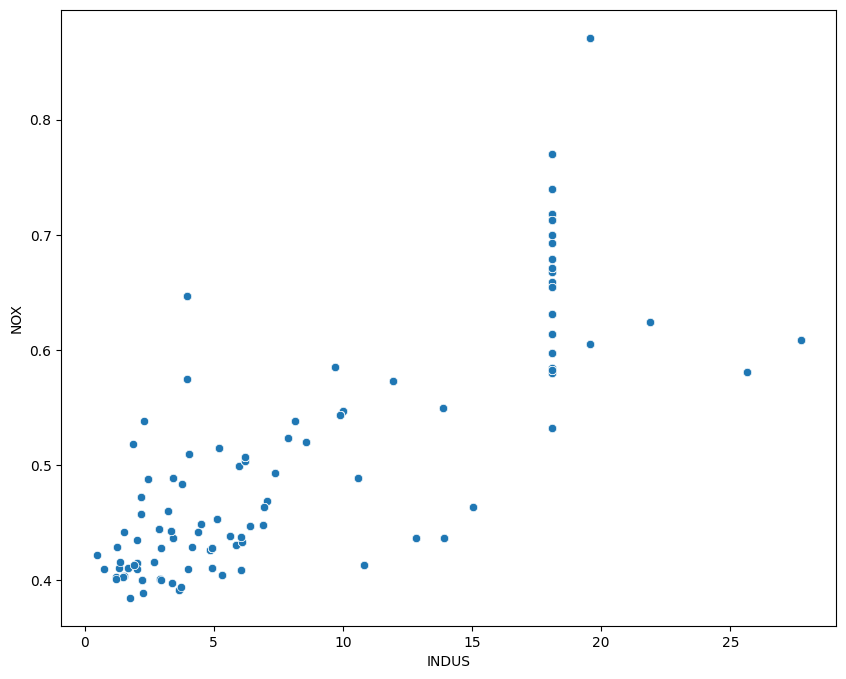

In [32]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.INDUS, y = df.NOX)
plt.show()

**Observations:**
- There doesnt seem to be any pattern in the correlation between NOX and INDUS.

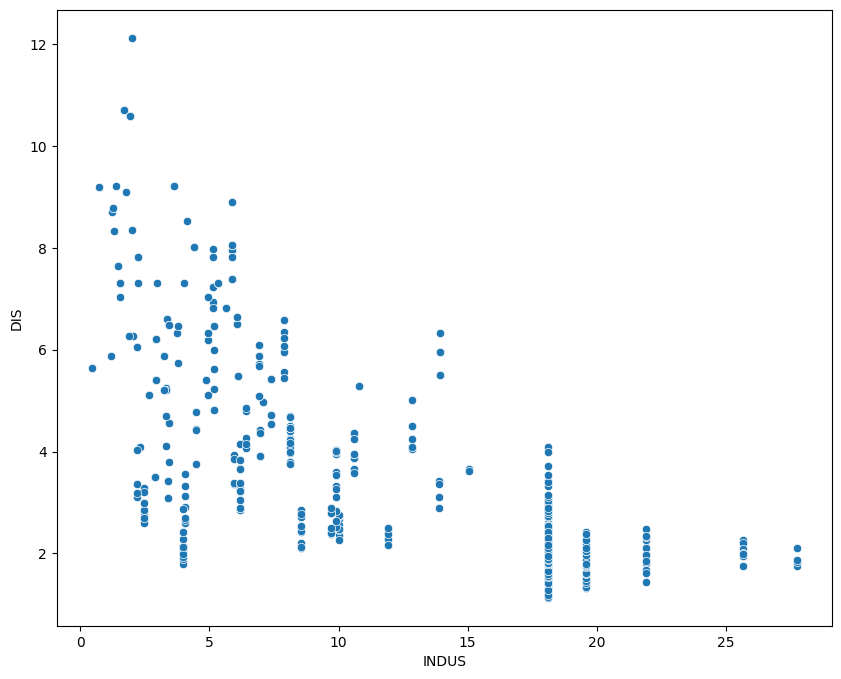

In [33]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.INDUS, y = df.DIS)
plt.show()

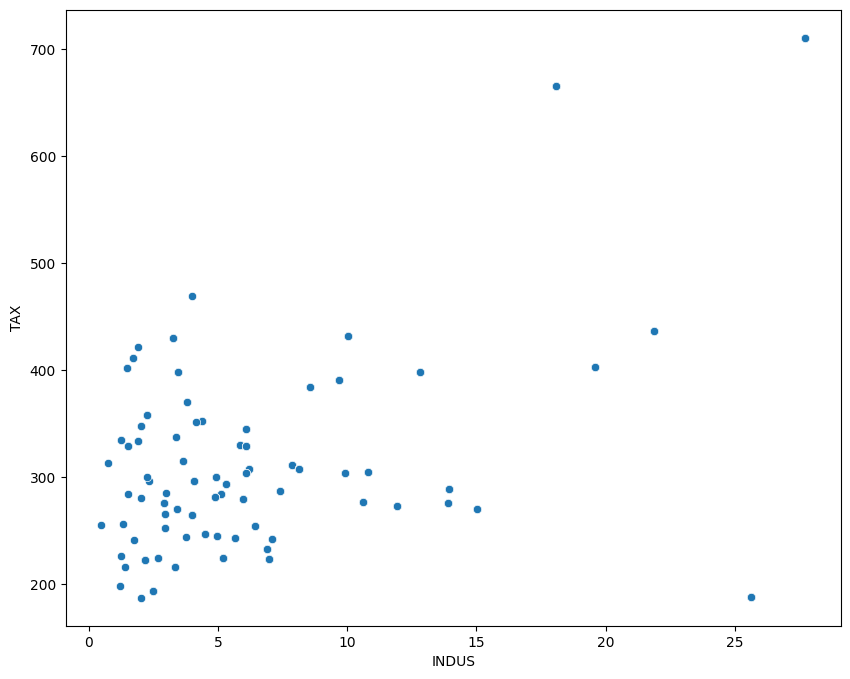

In [34]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.INDUS, y = df.TAX)
plt.show()

**Observations:**
- There seems to be an increase in higher proportions of INDUS with TAX.

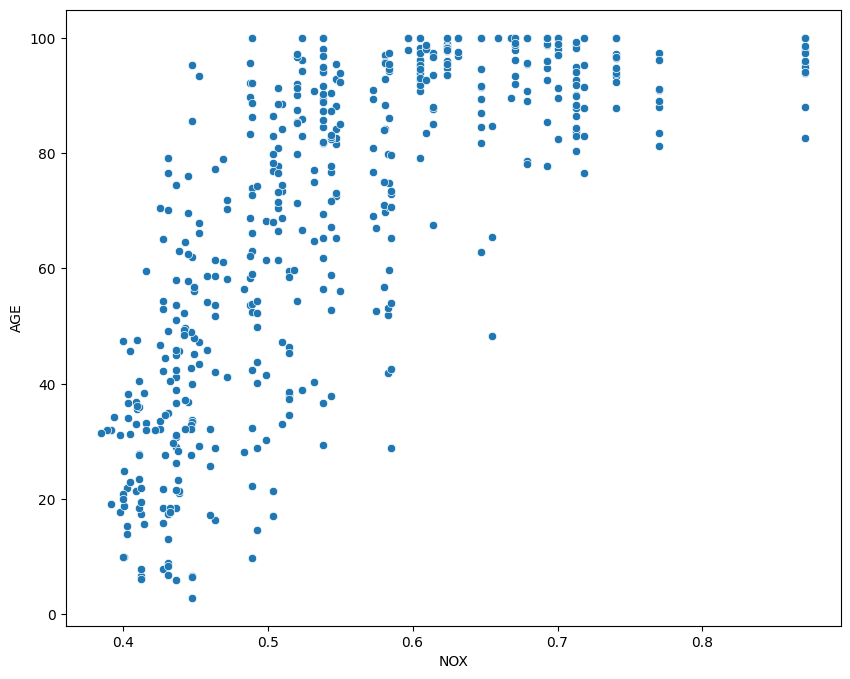

In [35]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.NOX, y = df.AGE)
plt.show()

**Observations:**
- There seems to be a pattern of increase in NO2 concentration with the increase in houses built before 1940 which would imply that the houses would be located in places closer to higher NO2 concentration(near employment centres).

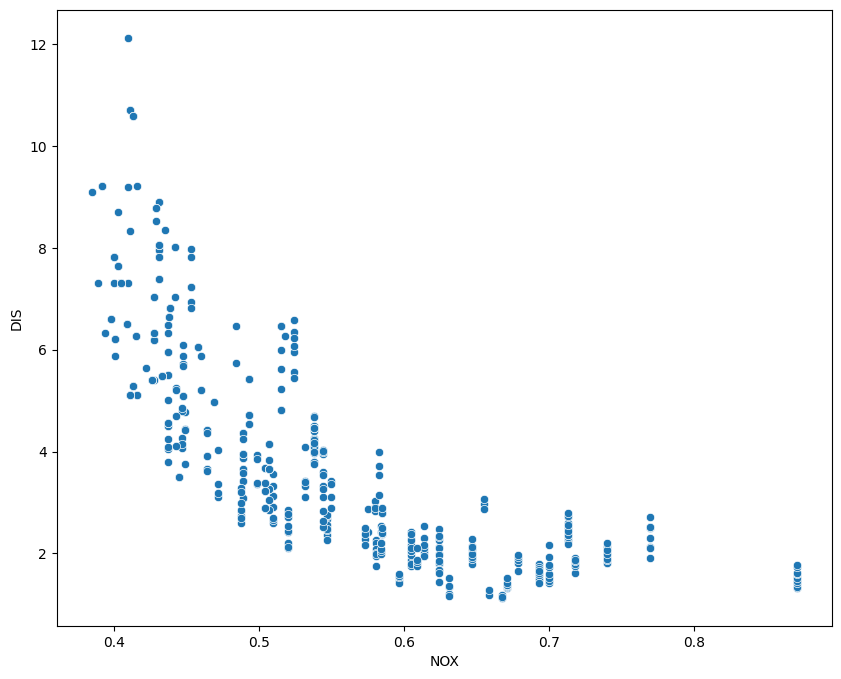

In [36]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.NOX, y = df.DIS)
plt.show()

**Observations:**
- There is a gradual increase in NO2 concentration to the decrease in distances to the employment centres. Meaning the employment centres might be the source to the high NO2 concentration and would mean houses built before 1940 must be closer to employment centres than the ones built after that.

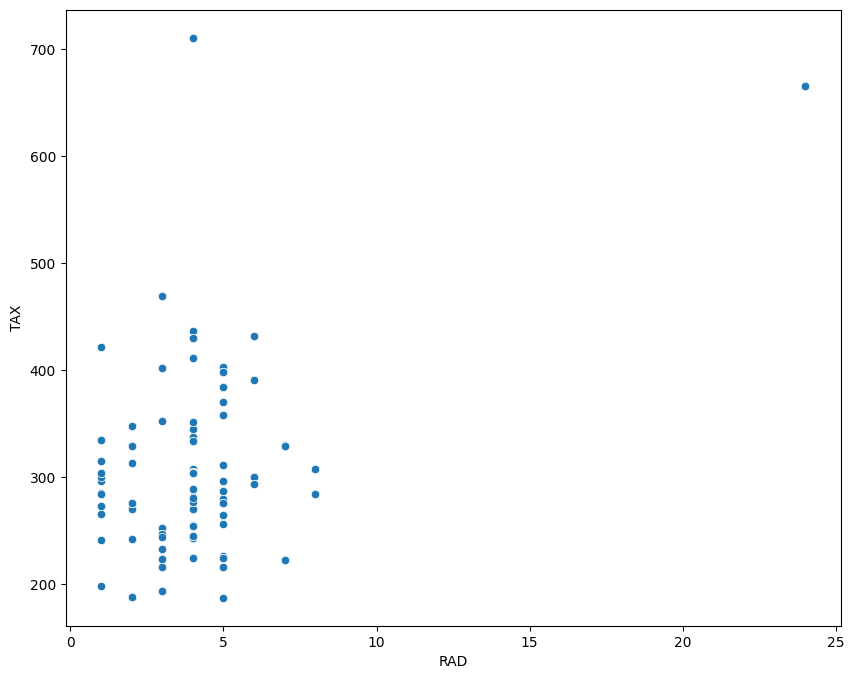

In [37]:
plt.figure(figsize = [10, 8])
sns.scatterplot(x = df.RAD, y = df.TAX)
plt.show()

**Observations:**
- Even though the positive correlation was extremely high with RAD and TAX. There doesnt seem any significant relationship between these two. This could be due to both of them having outliers.

The correlation value is: 0.24975731331429218


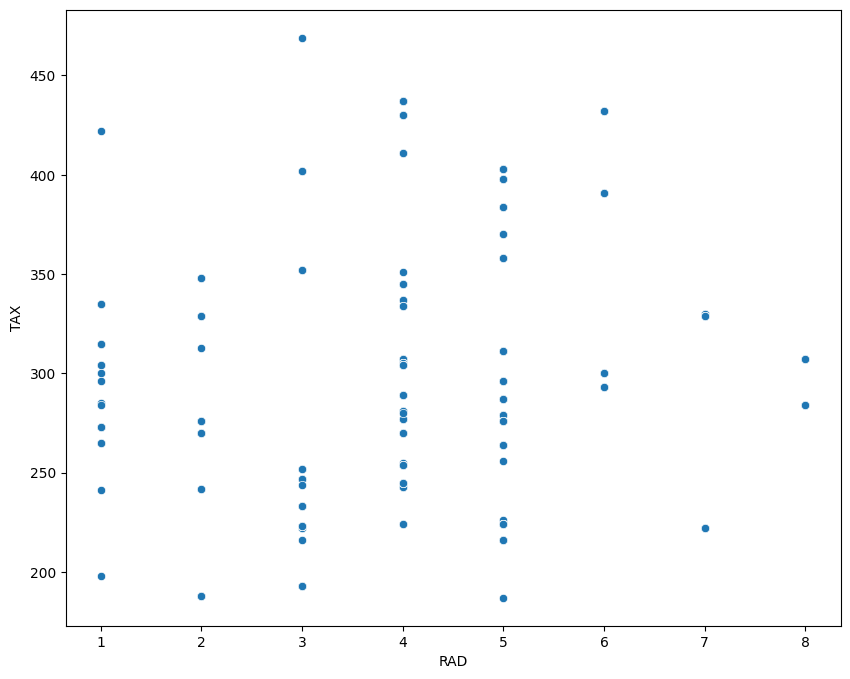

In [38]:
#Creating another dataframe without making changes to the original one and also removing the outliers.
df1=df[(df['TAX']<600) & (df['RAD']<15)]
df1.head()

plt.figure(figsize = [10, 8])

#calculating correlation value between RAD and TAX.
correlation = df1['RAD'].corr(df1['TAX'])
print("The correlation value is:",correlation)

sns.scatterplot(x = df1.RAD, y = df1.TAX)
plt.show()

**Observations:**
- After removing the outliers and calculating the correlation value, we find out that the correlation is very less. The high value was because of the outliers.
- Even the relationship from the scatterplot seems insignificant. In this case, it would mean that there might be some other reason for the TAX being high which would have to do less with the the higher accessbility with radial highways.

## Model Building - Linear Regression

In [39]:
#We first need to separate the dependent and independent variables.
Y=df['MEDV_log']
X=df.drop(columns={'MEDV_log','MEDV'})


#We add the intercept term
X = sm.add_constant(X)

In [40]:
#Now let us split the data into testing set and the training set. Right now, we are splitting the data in 70:30 ratio(training to test).
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [41]:
#We Check the shape of the train and test data.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (354, 13)
Shape of test set :  (152, 13)


## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [42]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [43]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(X_train)

# Add constant to test data
x_test1 = sm.add_constant(X_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.19
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          3.27e-102
Time:                        03:10:14   Log-Likelihood:                 80.575
No. Observations:                 354   AIC:                            -135.1
Df Residuals:                     341   BIC:                            -84.85
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6856      0.241     19.404      0.0

Observations:

- We can observe that R-squared for the model is ~0.77 and it indicates a good fit for our model.
-

In [44]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.191963,0.143914,0.786246,0.76611,5.004389


In [45]:
print("Performance on train data: ")
model_performance_regression(olsmodel1, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.192713,0.140133,0.773772,0.765123,4.864376


In [46]:
print("Performance on test data: ")
model_performance_regression(olsmodel1, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.191963,0.143914,0.786246,0.76611,5.004389


In [47]:
#Now let us check the multicollinearity of the training data.
from statsmodels.stats.outliers_influence import variance_inflation_factor

#The Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
- We can see that the VIF for RAD and TAX are very high with TAX being the highest.
- First, let us try dropping TAX from the dataset and do the VIF again to check multicollinearity.

In [48]:
#Dropping the column 'TAX'.
X_train = X_train.drop(['TAX'],axis=1)

# checking for VIF again.
print(checking_vif(X_train))


    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


**Observations:**
- The VIF has already improved drastically for the training dataset.
- All the independent variables have their VIF scores lesser than 5.
- We can proceed with this training dataset assuming that the multicollinearity is not there between the variables.

**Observations:**
- The R-squared and adjusted R-squared are high enough indicating a good confidence level about the model. But we also notice that
- The p-value is higher for ZN, INDUS and AGE which would imply a very minimal significance from thes independent variables. The null hypothesis is true and we can try and drop these variables to see if it makes a difference in the R-squared and adjusted R-squared values.


In this case, we can try dropping those three variables( ZN, INDUS and AGE) and try running the OLS regression model again.

In [49]:
#We separate the dependent and independent variables.
Y=df['MEDV_log']
X=df.drop(columns={'MEDV_log','MEDV','ZN','AGE','INDUS','TAX'})


#We add the intercept term
X = sm.add_constant(X)

#Now let us split the data into testing set and the training set. Right now, we are splitting the data in 70:30 ratio(training to test).
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)





In [50]:
#Now let us check the multicollinearity of the training data.
from statsmodels.stats.outliers_influence import variance_inflation_factor

#The Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

   feature         VIF
0    const  526.961418
1     CRIM    1.892679
2     CHAS    1.049602
3      NOX    3.528194
4       RM    1.748438
5      DIS    2.582254
6      RAD    2.838523
7  PTRATIO    1.591527
8    LSTAT    2.437311


In [51]:
#We Check the shape of the train and test data.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (354, 9)
Shape of test set :  (152, 9)


In [52]:
# Create the model
olsmodel2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          2.61e-104
Time:                        03:10:14   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
- We can see that the R-squared value has decreased and adjusted R-sqaured value has increased by 0.001. The adjusted R-squared value is still less than than R-squared which means that some independent variables are not much significant to the dependent variable.
- We can go ahead and try the linear regression assumptions.

In [53]:
print("Performance on train data: ")
model_performance_regression(olsmodel2, X_train, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195504,0.143686,0.767174,0.761082,4.981813


In [54]:
print("Performance on test data: ")
lin_reg_test = model_performance_regression(olsmodel2, X_test, y_test)
lin_reg_test

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


**Observation:**

- There train and test scores are very close to each other which would mean that this model generalizes well and does not overfit our data.
- We can try applying cross validation to see if the performance can be improved.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**We check below the linear regression assumptions:**
-  Mean of residuals should be 0.
-  No Heteroscedasticity.
-  Linearity of variables.
-  Normality of error terms.

## 1. Check for mean of residuals.

In [55]:
residuals = olsmodel2.resid
residuals.mean()

-2.5303049047106675e-15

**Observations:**
- The mean value for the residuals is very close to zero. This means that this assumption is satisfied.

## 2. Check for homoscedasticity.

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We will use Goldfeldquandt Test to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [56]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [57]:
name=["F statistic","p-value"]
test= sms.het_goldfeldquandt(y_train,X_train)
lzip(name,test)

[('F statistic', 1.0835082923425292), ('p-value', 0.30190120067668275)]

**Observations:**
- The p-value is greater than 0.05 which would mean that we accept the null hypothesis and the residuals are homoscedastic.
- This means that this model is suitable for our data.

## 3.Linearity of variables.

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

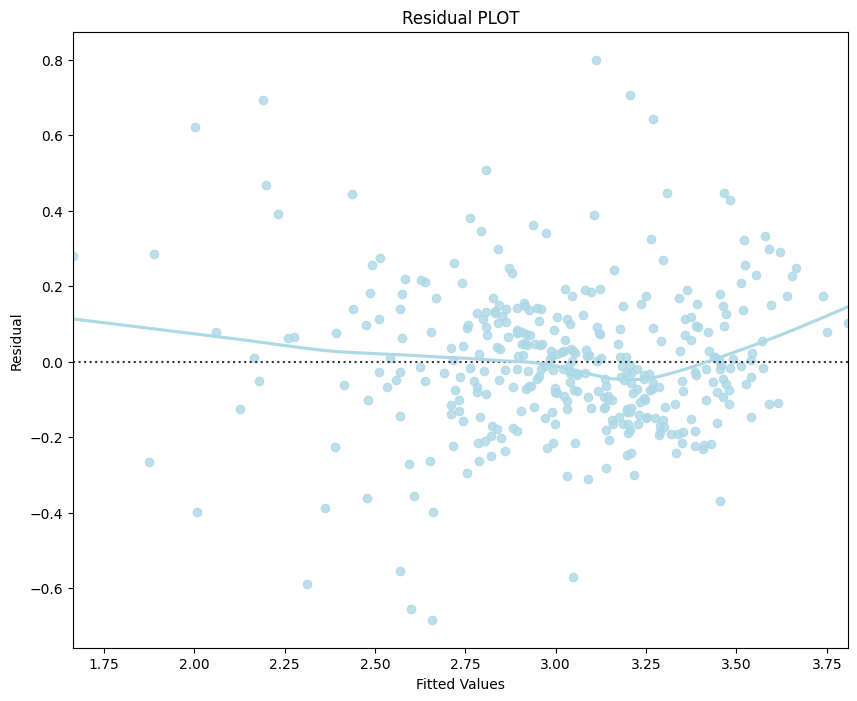

In [58]:
# Predicted values
fitted = olsmodel2.fittedvalues

plt.figure(figsize=(10, 8))

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**
- We can observe that there no proper pattern in this and that the residuals seem randomly and uniformly scattered. This means that the data is much more reliable and we can proceed with it.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

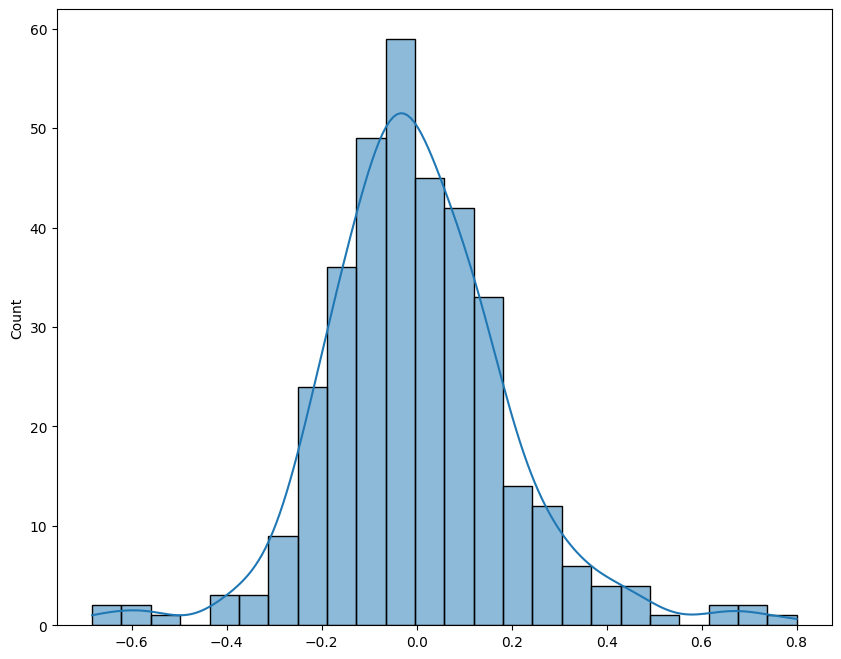

In [59]:
# Plot histogram of residuals
plt.figure(figsize=(10, 8))

sns.histplot(residuals, kde = True)

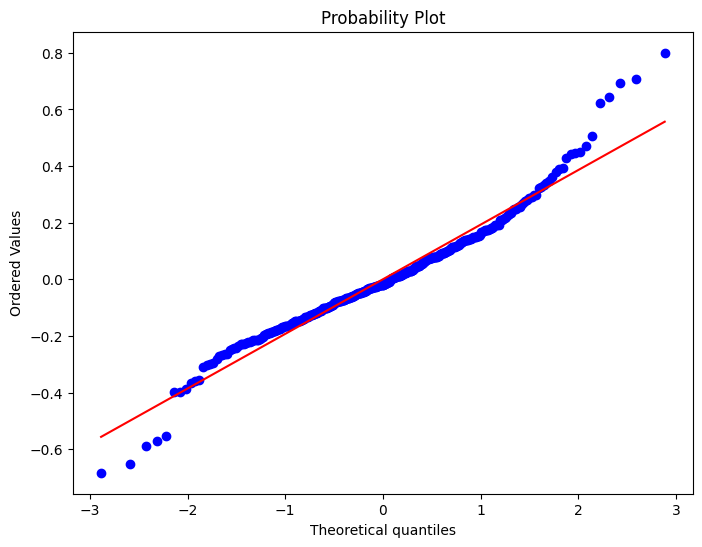

In [60]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

plt.figure(figsize=(8, 6))

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, this assumption is satisfied.
- We can check the model performance on the train and test datasets and also do cross validation on it.

In [61]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observation:**

- We see that the Rsquared value has decreased which could indicate overfitting. We can try to use regularization methods to improve it and see if there are better scores.

In [62]:
coef = olsmodel2.params
coef

const      4.649386
CRIM      -0.012500
CHAS       0.119773
NOX       -1.056225
RM         0.058907
DIS       -0.044069
RAD        0.007848
PTRATIO   -0.048504
LSTAT     -0.029277
dtype: float64

In [63]:
# Let us write the equation of the model
Equation = "Median Price for the households="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Median Price for the households=	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 

In [64]:
ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(X_train, y_train) # Fitting the data into the model

Ridge()

In [65]:
ridge_reg = model_performance_regression(ridge_model, X_test, y_test) #getting performance metrics on test data
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195568,0.148421,0.778141,0.76408,5.156727


**Observations:**

- The performance metrics are showing almost similar results as compared to the Least Squares method with not much significant difference.

In [66]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [67]:
model_cv.best_params_ #getting optimised parameters for alpha

{'alpha': 0.01}

In [68]:
ridge_model_tuned = Ridge(alpha=0.1) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.1)

In [69]:
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.197408,0.150542,0.773948,0.759621,5.232868


**Observations:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.1.
- It can be observed that even after tuning the parameters of Ridge Regression, the performance parameters do not change much implying that Ridge Regression doesnt help in this case.

In [70]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [71]:
lasso_reg = model_performance_regression(lasso_model, X_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.287188,0.207473,0.521576,0.491254,7.118113


**Observations:**

- After fitting the data into Lasso Regression Model with default value, the performance metrics show poor results as compared to Least Squares method and Ridge Regression.
- We can try to tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

In [72]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [73]:
model_cv.best_params_

{'alpha': 0.001}

In [74]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [75]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.196715,0.14966,0.775532,0.761305,5.199207


**Observations:**

- The model still does not improve even after tuning.

In [76]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [77]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test, y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.253905,0.186263,0.626042,0.60234,6.308978


**Observations:**

- The elastic net model also seems to show poor results. We can try tuning this as well.

In [78]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [79]:
model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.001}

In [80]:
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.001)
elasticnet_model_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [81]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.196394,0.149523,0.776264,0.762084,5.197382


**Observation**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.001.
- The performance metrics are showing almost similar results as compared to Least Squares method, Ridge Regression and Lasso Regression, implying that after tuning the Elastic Net, the model does not improve.

In [82]:
models= pd.concat([lin_reg_test,ridge_reg,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,0.198045,0.151284,0.772486,0.758066,5.257965
0,Ridge Regression,0.195568,0.148421,0.778141,0.764080,5.156727
0,Ridge Regression Tuned,0.197408,0.150542,0.773948,0.759621,5.232868
0,Lasso Regression,0.287188,0.207473,0.521576,0.491254,7.118113
0,Lasso Regression Tuned,0.196715,0.149660,0.775532,0.761305,5.199207
0,Elastic Net Regression,0.253905,0.186263,0.626042,0.602340,6.308978
0,Elastic Net Regression Tuned,0.196394,0.149523,0.776264,0.762084,5.197382


**Observations:**

- As per the above result, the Ridge Regression Method is giving the best results as compared to other models.
- Regularization technique is not offering any significant improvement to the performance metrics.
- So, we will apply some Non-Linear models** to check if the model performance improves or not.

In [83]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.194811,0.13638,0.779857,0.765904,4.810739


**Observations:**

- The Decision Tree Regressor also does not seem to show much difference in value.

In [84]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(X_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, X_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.148773,0.112299,0.871611,0.863473,3.948458


**Observations:**

- The Bagging Regressor shows a very high and good value compared to all the other non-linera models and decision tree regressor model at 87%.

In [85]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.14429,0.107639,0.879232,0.871577,3.808757


**Observations:**

- **Observations:**

- The Bagging Regressor shows an even higher value compared to the bagging regressor model.

In [86]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(X_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, X_test, y_test)

ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.188566,0.153566,0.793745,0.780673,5.25619


**Observations:**

- The adaBoost regressor shows a poor value compared the non-linear models.

In [87]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(X_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, X_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.152795,0.111319,0.864575,0.855992,3.957055


**Observations:**

- The Gradient Boost Regressor shows a very high value almost similar to Random Forest Regressor.

In [88]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [89]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, X_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.154053,0.108923,0.862337,0.853612,3.871449


**Observations:**

- The XgBoost Regressor shows a very high and good value compared to all the other non-linera models and decision tree regressor model at 87%.

In [90]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.194811,0.136380,0.779857,0.765904,4.810739
Bagging Regressor,0.148773,0.112299,0.871611,0.863473,3.948458
Random Forest regressor,0.144290,0.107639,0.879232,0.871577,3.808757
Ada Boost Regressor,0.188566,0.153566,0.793745,0.780673,5.256190
Gradient Boosting Regressor,0.152795,0.111319,0.864575,0.855992,3.957055
XG Boost Regressor,0.154053,0.108923,0.862337,0.853612,3.871449


- Based on the results obtained after comparing all of the models, the Random Forest Regressor is the best-performing model.
- The Random Forest Regressor has the lowest RMSE and MAE, indicating that the average difference between predicted and actual values is the smallest. It also has a higher R-squared and Adjusted R-squared, indicating that the model explains a significant proportion of the variance in the target variable. It also has a low MAPE, indicating that it has a small average percentage error.
- Because the Random Forest model performs well on test data, it is not overfitting the training data. Random Forest is also less complex than boosting models such as XGBoost.

- The Random Forest has a longer runtime in comparison to other models like Decision Tree. Hence, there is a trade-off between runtime and model performance. In this case, we are prioritizing the model performance over runtime, but other approaches are possible depending on the scenario.

- Let's see if we can improve the model performance by tuning the hyperparameters of the Random Forest model. Hyperparameter tuning is a crucial step in machine learning as it helps to optimize the model's performance by finding the best set of hyperparameters that work well for the given dataset.

In [91]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, None],

    "max_features": [0.8, 1]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(X_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, X_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.145866,0.108417,0.876579,0.868757,3.841668


In [92]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T,
        rf_tuned_regressor_perf_test.T,
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor",
    "Random Forest Tuned Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.194811,0.136380,0.779857,0.765904,4.810739
Bagging Regressor,0.148773,0.112299,0.871611,0.863473,3.948458
Random Forest regressor,0.144290,0.107639,0.879232,0.871577,3.808757
Ada Boost Regressor,0.188566,0.153566,0.793745,0.780673,5.256190
Gradient Boosting Regressor,0.152795,0.111319,0.864575,0.855992,3.957055
XG Boost Regressor,0.154053,0.108923,0.862337,0.853612,3.871449
Random Forest Tuned Regressor,0.145866,0.108417,0.876579,0.868757,3.841668


**Observations:**

- After tuning, the performance of **Random Forest Regressor** model has slightly **improved in terms of RMSE and R-squared values**, as compared to the model with default value of the hyperparameters. Hence, we can choose the Random Forest model as the final model.

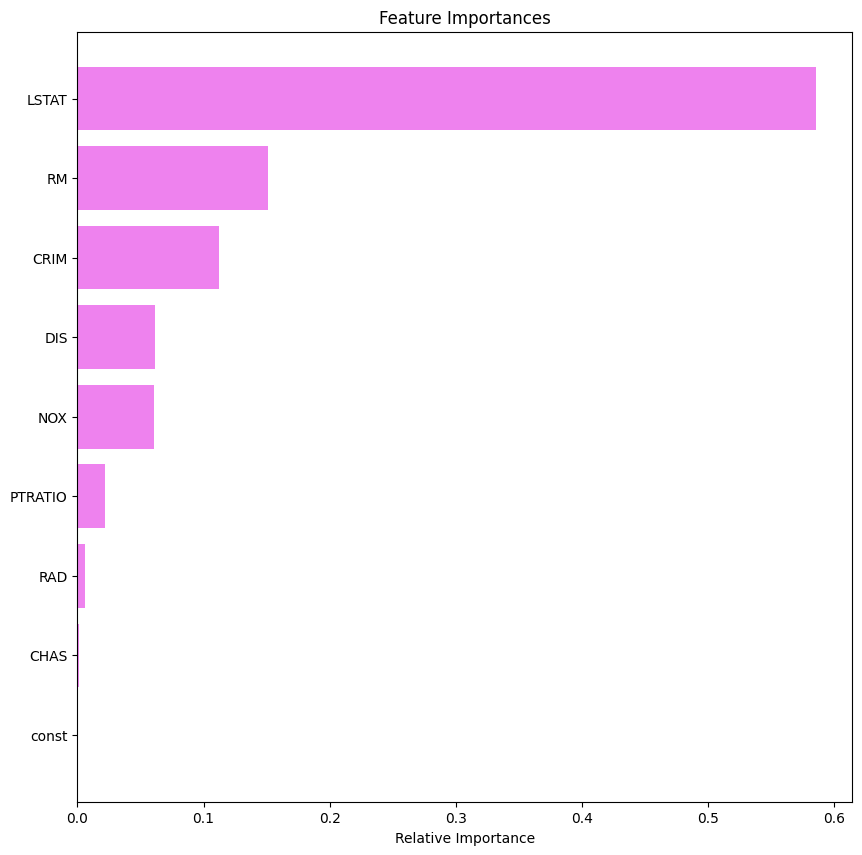

In [93]:
# Plotting the feature importance
features = list(X.columns)

importances = rf_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- **The most important features** are LSTAT and RAD predicting the housing prices for the model.
- The rest of the variables have little or no influence on the price prediction for this model.

## Final Model

- The performance of **Random Forest Regressor** model has the most **improved values in terms of RMSE and R-squared values**, as compared to the all the other models with default value of the hyperparameters. Hence, we choose the Random Forest model as the final model.

## Actionable Insights and Recommendations

- At least 50% of Boston towns have no zoned lands for large lots(25000 sq ft) .
- Most of the houses are not on Charles riverside as it is more pricier and it increases even more when the number of rooms are higher per unit.
- Most of the owner-occupied houses before 1940 are located closer employeement center where oxide concentration is high which are near employment centres.


**Equation:**
   - Median House Prices = ( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT +

- LSTAT is the most important feauture of the variables which means depending upon where the concentration of people having lower status of living, the price varies. Houses can be built around depending on this.

- Crime rates, Distance to employment centres and PTRATIO affect the house prices negatively.
- If Crime rates could be controlled overall and if more houses could be built near employment centres, it could help in improve house prices.

In [98]:
!jupyter nbconvert --to html Notebook+_+SuperKart+Sales+Prediction_final.ipynb

[NbConvertApp] Converting notebook Notebook+_+SuperKart+Sales+Prediction_final.ipynb to html
[NbConvertApp] Writing 2217977 bytes to Notebook+_+SuperKart+Sales+Prediction_final.html
